# Convert raw corpus to a pandas dataframe

This notebook is a simple example of how to convert a raw corpus (a corpus represented as a directory of files) to a pandas dataframe. The corpus is represented sentence by sentence in the dataframe.

In [1]:
%load_ext autoreload
%autoreload 2

from src.data.make_dataset import convert_raw_corpus_to_df, combine_phrases_in_corpus

import matplotlib.pyplot as plt

First convert the corpus into a dataframe and do some initial pre-processing

In [2]:
%time df = convert_raw_corpus_to_df("../../data/raw/Zapatismo_sm", clean = True)

CPU times: user 19 s, sys: 2.67 s, total: 21.7 s
Wall time: 22.4 s


In [3]:
df.head()

,date,document_index,sentence_index,raw_sentence,cleaned_sentence
0,1994-02-26,0,0,Comunicado conjunto de las Jornadas de Diálogo...,comunicado conjuntar jornadas diálogo 26 febre...
1,1994-02-26,0,1,No podemos soslayar la interpretación de que e...,soslayar interpretación momento crítico acuerdo
2,1994-02-26,0,2,Lo cual quiere decir que nos movemos en un esp...,mover espíritu responsabilidad
3,1994-02-26,0,3,Somos conscientes de que codo lo que aquí se a...,consciente codo acordar mesa diálogo verificar...
4,1994-02-26,0,4,"Consideramos que el esfuerzo común, la serieda...",consideramos esforzar común seriedad intercamb...


In [4]:
df[df.document_index == 2].head()

,date,document_index,sentence_index,raw_sentence,cleaned_sentence
34,1994-02-08,2,0,Al Frente Cívico de Mapastepec: el gobierno co...,frente cívico mapastepec gobernar colectivo go...
35,1994-02-08,2,1,Recibimos su carta de fecha 6 de febrero de 1994.,recibimos carta fecho 6 febrero 1994
36,1994-02-08,2,2,La inmensa mayoría de los presidentes de los m...,inmenso mayoría presidente municipio chiapanec...
37,1994-02-08,2,3,Todos los presidentes municipales del estado d...,presidente municipal chiapas renunciar o deponer
38,1994-02-08,2,4,En su lugar deberían formarse concejos municip...,deber formarse concejo municipal elegir democr...


In [5]:
df[df.sentence_index == 0].head()

,date,document_index,sentence_index,raw_sentence,cleaned_sentence
0,1994-02-26,0,0,Comunicado conjunto de las Jornadas de Diálogo...,comunicado conjuntar jornadas diálogo 26 febre...
9,1994-01-20,1,0,Conclusiones del juicio popular seguido en con...,conclusiones juicio popular seguir prisionero ...
34,1994-02-08,2,0,Al Frente Cívico de Mapastepec: el gobierno co...,frente cívico mapastepec gobernar colectivo go...
46,1994-03-19,3,0,A las organizaciones indígenas y campesinas: a...,a organización indígena y campesino alzar arma...
63,1994-01-20,4,0,Sobre las demandas centrales y las formas de l...,demandar central y formar luchar demandas cent...


In [6]:
df.to_csv("../../data/processed/Zapatismo_sm.csv")

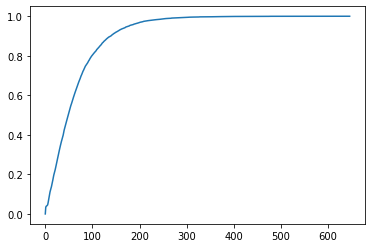

In [7]:
plt.plot([len(df[df.cleaned_sentence.str.len() < n])/len(df) for n in range(df.cleaned_sentence.str.len().max())])

Next, obtain the sentences with common phrases combined into a single token

In [8]:
combine_phrases_in_corpus(df, 'cleaned_sentence', min_count=50)
df[['raw_sentence', 'cleaned_sentence_with_phrases']].tail()

,raw_sentence,cleaned_sentence_with_phrases
7614,"Permitidnos antes, topos lejanos, como saludo ...",permitidnos topo lejano saludar postrero envia...
7615,Un pedacito de luna…/ Pero en realidad no es u...,pedacito luna realidad uno/ pedacitos:/ pedaci...
7616,"Igual nosotros,/ si nos toca ser el lado oscur...","nosotros,/ tocar oscuro luna/ menos,/ dispuest..."
7617,Y así es que/ son pocos los que están dispuest...,y que/ dispuestos/ a sufrir sufran/ y a morir/...
7618,"Vale, topos de siempre, os veremos de nuevo ba...",vale topo ver tierra subcomandante_marcos
